In [2]:
import requests
from bs4 import BeautifulSoup
import json
import re
import os
import pandas as pd

In [4]:
#Webscraping der Websiten-URLs, die auf die Spielseiten der Augsburgspiele führt.
url='https://understat.com/team/Augsburg/2024'
variable_name1= 'datesData'
response1= requests.get(url)
soup1= BeautifulSoup(response1.content, "html.parser")
scripts1 = soup1.find_all('script')
# Nach dem Script mit 'datesData' suchen
for script in scripts1:
    if 'datesData' in script.string:
        json_data_raw = script.string
        break
x= json_data_raw.find('(')
y= json_data_raw.find(')')
json_data_raw=json_data_raw[x+2:y-1]
json_clean = json_data_raw.encode().decode('unicode_escape')
##in python-Dictonary umwandeln
data = json.loads(json_clean)
## in Datei abspeichern
notebook_path = r"C:\Users\Schönherr\xGModell"
filename = os.path.join(notebook_path, "websiten.json")
with open(filename, "w") as outfile:
    json.dump(data, outfile, indent=4)
with open(filename, 'r') as infile:
    json_data_dates = json.load(infile)
##alle Websitenurl heruausfinden
df = pd.DataFrame(json_data_dates)
website_url= df.iloc[:,0].to_list()
url ='https://understat.com/match/'
websiten_liste= []
for x in range(0,34):
    websiten_liste.append(url + website_url[x])
## Die Liste aller Spielstatistikenwebsiten für die Spiele des FC Augsburg in der Saison 24/25

In [10]:
#alle Schüsse in der Saison 24/25 zu der Json-Datei hinzufügen
notebook_path = r"C:\Users\Schönherr\xGModell"
if not os.path.exists(notebook_path):
    os.makedirs(notebook_path)
filename = os.path.join(notebook_path, "shots.json")
alle_shots=[]
for x in websiten_liste:
    url  = x
    variable_name='shotsData'
    response= requests.get(url)
    soup = BeautifulSoup(response.content, "html.parser")
    scripts = soup.find_all('script')
    for script in scripts:
        if variable_name in script.text:
            ##Json-Rohdaten finden
            start = script.text.find('JSON.parse("') + len('JSON.parse("')
            end = script.text.find('");', start)
            ##Rohdaten so manipulieren, dass nur noch die escape-Daten vorhanden sind
            json_raw = script.text[start:end]
            x= json_raw.find('(')
            y= json_raw.find(')')
            json_raw=json_raw[x+2:y-1]
            ## von escape Rohdaten in normaler JSON-Form umwandlen
            json_clean = json_raw.encode().decode('unicode_escape')
            ##in python-Dictonary umwandeln
            data = json.loads(json_clean) 
            alle_shots.append(data)
            break
notebook_path = r"C:\Users\Schönherr\xGModell"
with open(filename, "w", encoding='utf-8') as outfile:
    json.dump(alle_shots, outfile, indent=4, ensure_ascii=False)
    # Zum Testen Datei laden und ausgeben
with open(filename, 'r', encoding='utf-8') as infile:
    json_data_shots = json.load(infile)
print(json)

In [43]:
shots = []
for match in json_data_shots:   # Nicht "for x", sondern "for match"
    home_shots = match.get('h', [])
    away_shots = match.get('a', [])
    shots.extend(home_shots)
    shots.extend(away_shots)
print(shots)
all_shots = pd.DataFrame(shots)

# Prüfen, ob die Spalte 'player' da ist
print(all_shots.columns)

df_alexis = all_shots[all_shots['player'] == 'Alexis Claude Maurice']

filename = os.path.join(notebook_path, "shots_alexis.json")
with open(filename, "w", encoding='utf-8') as outfile:
    json.dump(df_alexis.to_dict(orient='records'), outfile, indent=4, ensure_ascii=False)

# Zum Testen Datei laden und ausgeben
with open(filename, 'r', encoding='utf-8') as infile:
    json_data_shots = json.load(infile)


[]
RangeIndex(start=0, stop=0, step=1)


KeyError: 'player'

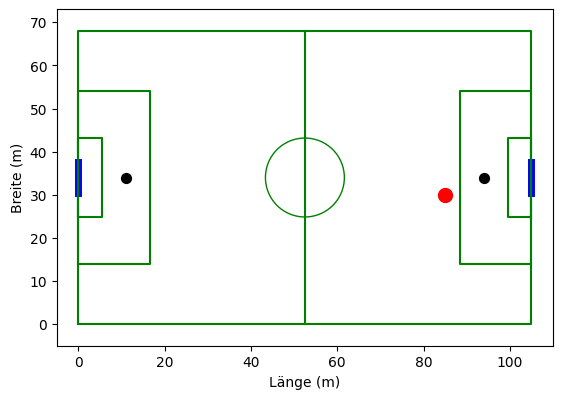

In [18]:
import matplotlib.pyplot as plt

# Spielfeld Größe in Metern (Standard)
feld_laenge = 105
feld_breite = 68

# Spielfeld zeichnen (Umriss)
plt.plot([0, feld_laenge, feld_laenge, 0, 0], [0, 0, feld_breite, feld_breite, 0], 'g-')

# Tor links (in der Mitte der Torlinie)
tor_breite = 7.32
tor_x_links = 0
tor_yunten = (feld_breite / 2) - (tor_breite / 2)
tor_yoben = (feld_breite / 2) + (tor_breite / 2)
plt.plot([tor_x_links, tor_x_links], [tor_yunten, tor_yoben], 'b-', linewidth=5)

# Tor rechts
tor_x_rechts = feld_laenge
plt.plot([tor_x_rechts, tor_x_rechts], [tor_yunten, tor_yoben], 'b-', linewidth=5)

# Strafraum links
strafram_tiefe = 16.5
strafram_breite = 40.3
plt.plot([0, strafram_tiefe, strafram_tiefe, 0, 0],
         [(feld_breite - strafram_breite) / 2, (feld_breite - strafram_breite) / 2,
          (feld_breite + strafram_breite) / 2, (feld_breite + strafram_breite) / 2,
          (feld_breite - strafram_breite) / 2], 'g-')
#Mittelfeldlinie
plt.plot([feld_laenge / 2, feld_laenge / 2], [0, feld_breite], 'g-')
# Strafraum rechts
plt.plot([feld_laenge, feld_laenge - strafram_tiefe, feld_laenge - strafram_tiefe, feld_laenge, feld_laenge],
         [(feld_breite - strafram_breite) / 2, (feld_breite - strafram_breite) / 2,
          (feld_breite + strafram_breite) / 2, (feld_breite + strafram_breite) / 2,
          (feld_breite - strafram_breite) / 2], 'g-')

# Torraum links
torraum_tiefe = 5.5
torraum_breite = 18.32
plt.plot([0, torraum_tiefe, torraum_tiefe, 0, 0],
         [(feld_breite - torraum_breite) / 2, (feld_breite - torraum_breite) / 2,
          (feld_breite + torraum_breite) / 2, (feld_breite + torraum_breite) / 2,
          (feld_breite - torraum_breite) / 2], 'g-')

# Torraum rechts
plt.plot([feld_laenge, feld_laenge - torraum_tiefe, feld_laenge - torraum_tiefe, feld_laenge, feld_laenge],
         [(feld_breite - torraum_breite) / 2, (feld_breite - torraum_breite) / 2,
          (feld_breite + torraum_breite) / 2, (feld_breite + torraum_breite) / 2,
          (feld_breite - torraum_breite) / 2], 'g-')

# Mittelkreis
mittelkreis_radius = 9.15
mittelkreis = plt.Circle((feld_laenge / 2, feld_breite / 2), mittelkreis_radius, color='g', fill=False)
plt.gca().add_patch(mittelkreis)

# Elfmeterpunkt links
elfmeter_x_links = 11
elfmeter_y = feld_breite / 2
plt.scatter(elfmeter_x_links, elfmeter_y, color='black', s=50 )

# Elfmeterpunkt rechts
elfmeter_x_rechts = feld_laenge - 11
plt.scatter(elfmeter_x_rechts, elfmeter_y, color='black', s=50)

# Beispiel-Schussposition (du kannst eigene x, y einsetzen)
# Achtung: muss vorher definiert werden! Hier ein Beispiel:
x = 85  # in Metern
y = 30  # in Metern
plt.scatter(x, y, color='red', s=100, label='Schuss Alexis Claude Maurice')

# Plot-Einstellungen
plt.xlim(-5, feld_laenge + 5)
plt.ylim(-5, feld_breite + 5)
plt.gca().set_aspect('equal', adjustable='box')

plt.xlabel('Länge (m)')
plt.ylabel('Breite (m)')

plt.grid(False)
plt.show()
